# Hyperparameter Tuning Visualisation
This notebook is used to generate graphs, figures etc. needed from the various results obtained during the hyperparameter tuning process.

In [2]:
#import of relevant modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys

C:\Users\Owner\AppData\Local\Temp\ipykernel_7376\1335182444.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


[ -8846.691069   12042.9775621  11084.2837508   7509.9064525
  -5026.7601371  -4899.1114307  56597.4093727 -11223.6000718
 -30019.3149324   8461.3194038]


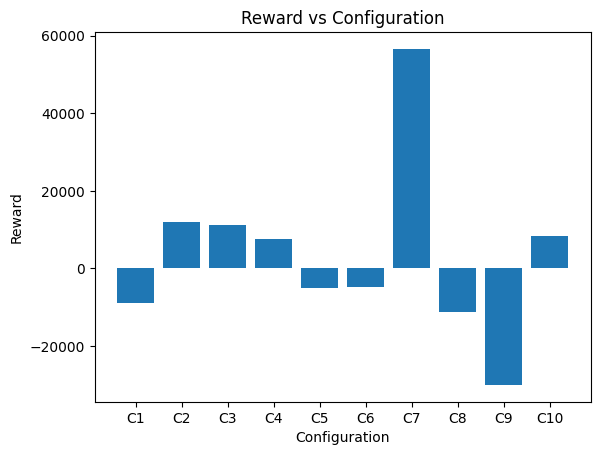

In [14]:
#extracting rewards from log file
data_paths = [f"pyperbot_v2/logs/hyperparam_test2/trial_{i}" for i in range(1, 11)]
data_path_10 = "pyperbot_v2/logs/hyperparam_test2/trial_10/trial10.csv"
#get value from trial 10
df = pd.read_csv(data_path_10)
rewards = df['value'].values
print(rewards)
#plot rewards vs config
config_list = [f'C{i}' for i in range(1, 11)]
plt.bar(config_list, rewards)
plt.xlabel('Configuration')
plt.ylabel('Reward')
plt.title('Reward vs Configuration')
plt.savefig('pyperbot_v2/logs/hyperparam_test2/reward_vs_config.png')

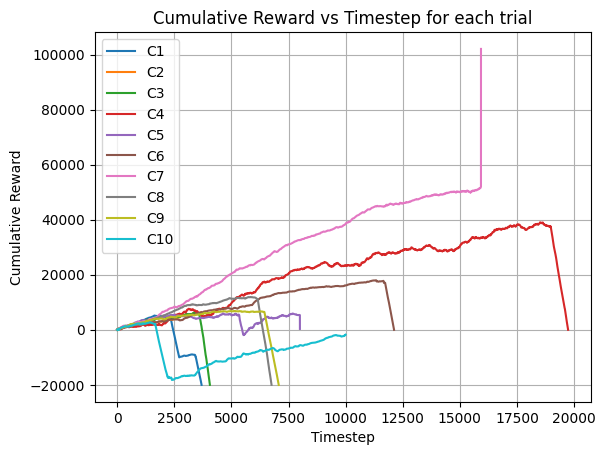

In [19]:
#Sampled trials and epsiodes from each config
#take episode 20 from each trial and plot cumulative reward
cum_rewards = []
for i in range(1, 11):
    data_path = f"pyperbot_v2/logs/hyperparam_test2/trial_{i}/episode_20.csv"
    df = pd.read_csv(data_path)
    cum_rewards.append(df.iloc[:,3].tolist())

#plot cum rewards against timestep for each episode
plt.figure()
for i in range(10):
    plt.plot(cum_rewards[i])
plt.xlabel('Timestep')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward vs Timestep for each trial')
plt.grid()
plt.legend(config_list)
plt.savefig('pyperbot_v2/logs/hyperparam_test2/cum_reward_vs_timestep.png')


In [38]:
#reward vs episode for each config
rewards = []
for i in range(1, 11):
    data_path = f"pyperbot_v2/logs/hyperparam_test2/trial_{i}/monitor.csv"
    df = pd.read_csv(data_path)
    new_list = df.iloc[:, 0].tolist()[1:]
    print(new_list)
    new_list = [int(i) for i in new_list]
    rewards.append(new_list)
print(rewards)

#plot rewards against episode for each config
plt.figure()
plt.plot(rewards[7])
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Reward vs Episode for each trial')
plt.grid()
plt.savefig('pyperbot_v2/logs/hyperparam_test2/reward_vs_episode.png')


['t']


ValueError: invalid literal for int() with base 10: 't'

In [ ]:
#generating correlation scores for each config hyperparameter

#extracting hyperparameters
hyperparams = []
data_path = "pyperbot_v2/logs/hyperparam_test2/trial_10/trial10.csv"
df = pd.read_csv(data_path)
for i in range(1, 11):
    hyperparams.append(df[f'param_{i}'].values)